# Importing necessary libraries

In [1]:
from collections import Counter
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt 

from xgboost import XGBClassifier
import numpy as np

# Preparing data

In [2]:
zip_file = ZipFile('../../data/out/clean.zip')
df_clean = pd.read_csv(zip_file.open('clean.csv'))

df_clean.head()

,is_app_approved,bad,annual_income,all0000,all0060,all0061,all0101,all0200,all0201,all0206,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
0,1,0.0,15171,10.0,8.000000,8.000000,0.0,9.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,20000,3.0,4.165954,5.237061,0.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,7000,6.0,4.165954,5.237061,0.0,4.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,18000,3.0,1.000000,1.000000,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,30000,6.0,4.165954,5.237061,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Oversampling

In [3]:
# oversample = SMOTE()
X = df_clean.drop(columns='bad')
y = df_clean.bad.astype(int)
# counter = Counter(y)
# print(counter)

# X,y = oversample.fit_resample(X,y)
# counter = Counter(y)
# print(counter)

## Standard Scale the data

In [4]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = pd.DataFrame(scaler.transform(X), columns = X.columns)
X = scaled_data

Splitting the dataset into train/test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Oversampling on training

In [6]:
oversample = SMOTE()
counter = Counter(y_train)
print(counter)

X_train,y_train = oversample.fit_resample(X_train,y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 27212, 1: 2570})
Counter({0: 27212, 1: 27212})


# Models

## Logistic Regression

In [ ]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## XGBoost

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgboost = XGBClassifier()
clf = GridSearchCV(xgboost, params, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)

logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

axes[0].plot(fpr, tpr, label='(test_AUC = %0.2f)' % logit_roc_auc)
axes[0].plot([0, 1], [0, 1],'r--')

axes[0].title.set_text('Receiver operating characteristic')
axes[0].legend(loc="lower right")


logit_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
plt.figure()
axes[1].plot(fpr, tpr, label='(train_AUC = %0.2f)' % logit_roc_auc)
axes[1].plot([0, 1], [0, 1],'r--')

axes[1].title.set_text('Receiver operating characteristic')
axes[1].legend(loc="lower right")

fig.tight_layout()

plt.show()

## Random Forest

In [ ]:
rdnfst = RandomForestClassifier()
rdnfst.fit(X_train, y_train)
y_pred = rdnfst.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Week 8 Discussion 

In [15]:
para_grid = {
'n_estimators': [100,200],
 'max_depth': [5,10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 }

rdnfst = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(rdnfst, para_grid, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


KeyboardInterrupt: 

In [ ]:
clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
model = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1)
model.fit(X, y)

In [ ]:
import pickle as pkl

pkl.dump(model,open("model.pkl", "wb"))

In [ ]:
display(pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head())

In [ ]:
clf=model

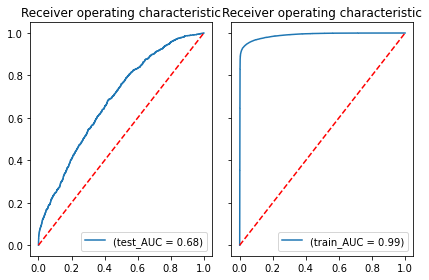

<Figure size 432x288 with 0 Axes>

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True)

logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

axes[0].plot(fpr, tpr, label='(test_AUC = %0.2f)' % logit_roc_auc)
axes[0].plot([0, 1], [0, 1],'r--')

axes[0].title.set_text('Receiver operating characteristic')
axes[0].legend(loc="lower right")


logit_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
plt.figure()
axes[1].plot(fpr, tpr, label='(train_AUC = %0.2f)' % logit_roc_auc)
axes[1].plot([0, 1], [0, 1],'r--')

axes[1].title.set_text('Receiver operating characteristic')
axes[1].legend(loc="lower right")

fig.tight_layout()

plt.show()

In [ ]:
# def final_model(raw_data):
#     clean_data = data_cleaner(raw_data) # Fully cleans data
#     final_proba = BEST_MODEL.predict_proba(clean_data)
#     final_preds = BEST_MODEL.predict(clean_data)

In [ ]:
X['is_app_approved'].value_counts()



In [ ]:
X

In [ ]:
TEST = pd.read_csv('../../test/testdata.csv')



In [ ]:
TEST

In [ ]:
predictions = pd.read_csv('../../predictions.csv')

In [ ]:
predictions

In [ ]:
actual = TEST['bad'].to_numpy()

In [ ]:
pred = predictions.iloc[:, 0].to_numpy()


In [ ]:
(actual - pred).mean()